# Evaluation Analysis for Recommender Output

In this section, our goal is to analyze and compare the generated recommendations and predictions from a predefined list of algorithms

Purpose of the notebook
Say purpose of each set of packages

## Setup

In [1]:
from pathlib import Path


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from lenskit import topn
from lenskit.metrics.predict import rmse

## Load Data

The name of the directory that holds the files that are required to successfully run this analysis should be specified here. The naming convention described below should be adhered to cause the names of the dataset and algorithm needed for the analysis are extracted from the sub-directory names.

* outermost-directory [name-of-outermost-directory]
    * sub-directory [dataset-algo] (Name of dataset and algorithm with a hyphen between them)
    
Each sub-directory within the outermost-directory must contain the recommendation and prediction dataset files that are to be used in the analysis. The name of each sub-directory must reflect the dataset and algorithm used in generating the dataset files it holds. Hence, the naming convention for the sub-directory must be adhered to. 

In [4]:
out_dir = Path("output")

In [5]:

dirs = [e for e in out_dir.iterdir() if e.is_dir()]

In [6]:
recs = []
for fld in dirs:
    for file in fld.glob("recs-*"):
        rec = pd.read_csv(file, sep=',')
        rec["dataset"] = fld.name.split("-")[0]
        rec["algorithm"] = fld.name.split("-")[1]
        recs.append(rec)

recs = pd.concat(recs, ignore_index=True)
recs = recs.astype({'dataset': 'category', 'algorithm': 'category'})

In [7]:
preds = []
for fld in dirs:
    for file in fld.glob("pred-*"):
        pred = pd.read_csv(file, sep=',')
        pred["dataset"] = fld.name.split("-")[0]
        pred["algorithm"] = fld.name.split("-")[1]
        preds.append(pred)

preds = pd.concat(preds, ignore_index=True)

Specify the name of the directory where the test dataset files that are to be used for the analysis are retrieved. Each test dataset must have a corresponding recommendation/prediction dataset.

In [8]:
testSplitData = "splitData"

In [9]:
path = Path(testSplitData)
dirs = [e for e in path.iterdir() if e.is_dir()]

In [10]:
test = []
for fld in dirs:
    for file in fld.glob("test-*"):
        test.append(pd.read_csv(file, sep=','))

test = pd.concat(test, ignore_index=True)

# Compute Metrics

The lenskit.metrics.topn module contains metrics for evaluating top-N recommendation lists. https://lkpy.lenskit.org/en/stable/evaluation/topn-metrics.html. The following top-n metrics (precision, ndcg, reciprocal rank) are computed for this analysis.  The RecListAnalysis class encapsulates an analysis with one or more metrics, and can apply it to data frames of recommendations. An analysis requires two data frames: the recommendation frame contains the recommendations themselves, and the truth frame contains the ground truth data for the users (refer to the documentation for detailed explanation of the purpose for the RecListAnalysis class). 

In [19]:
rla = topn.RecListAnalysis()

rla.add_metric(topn.precision)
rla.add_metric(topn.recip_rank)
rla.add_metric(topn.ndcg)

results = rla.compute(recs, test)
results

C:\Users\ngozi\Anaconda3\lib\site-packages\lenskit\topn.py:104: UserWarning: truth frame does not have unique values
  warnings.warn('truth frame does not have unique values')


nrecs  precision  recip_rank      ndcg
user dataset algorithms                                        
1    ml100k  ALS         100.0       0.00    0.000000  0.000000
             IALS        100.0       0.01    0.010526  0.026412
             II          100.0       0.01    0.016393  0.029259
             UU          100.0       0.00    0.000000  0.000000
     ml1m    ALS         100.0       0.01    0.045455  0.038912
             IALS        100.0       0.05    0.333333  0.230646
             II          100.0       0.01    0.055556  0.041614
             UU          100.0       0.01    0.010309  0.026292
     mlsmall ALS         100.0       0.00    0.000000  0.000000
             IALS        100.0       0.01    0.038462  0.036917
             II          100.0       0.00    0.000000  0.000000
             UU          100.0       0.00    0.000000  0.000000
2    ml100k  ALS         100.0       0.02    0.062500  0.061168
             IALS        100.0       0.05    0.111111  0.144221
             II          100.0       0.01    0.055556  0.042627
             UU          100.0       0.01    0.023810  0.032964
     ml1m    ALS         100.0       0.03    0.166667  0.135977
             IALS        100.0       0.05    0.043478  0.127820
             II          100.0       0.03    0.076923  0.128245
             UU          100.0       0.02    0.052632  0.066805
     mlsmall ALS         100.0       0.01    0.047619  0.040469
             IALS        100.0       0.01    0.022727  0.032559
             II          100.0       0.02    0.015625  0.046448
             UU          100.0       0.00    0.000000  0.000000
3    ml100k  ALS         100.0       0.00    0.000000  0.000000
             IALS        100.0       0.04    0.200000  0.111794
             II          100.0       0.00    0.000000  0.000000
             UU          100.0       0.00    0.000000  0.000000
     ml1m    ALS         100.0       0.01    0.020408  0.003834
             IALS        100.0       0.04    0.200000  0.195066
...                        ...        ...         ...       ...
6033 ml1m    II          100.0       0.00    0.000000  0.000000
             UU          100.0       0.00    0.000000  0.000000
6034 ml1m    ALS         100.0       0.01    0.015385  0.058245
             IALS        100.0       0.01    1.000000  0.350775
             II          100.0       0.01    0.010204  0.053030
             UU          100.0       0.00    0.000000  0.000000
6035 ml1m    ALS         100.0       0.00    0.000000  0.000000
             IALS        100.0       0.02    0.017544  0.127267
             II          100.0       0.01    0.016129  0.111054
             UU          100.0       0.00    0.000000  0.000000
6036 ml1m    ALS         100.0       0.00    0.000000  0.000000
             IALS        100.0       0.00    0.000000  0.000000
             II          100.0       0.00    0.000000  0.000000
             UU          100.0       0.00    0.000000  0.000000
6037 ml1m    ALS         100.0       0.00    0.000000  0.000000
             IALS        100.0       0.01    0.058824  0.077148
             II          100.0       0.00    0.000000  0.000000
             UU          100.0       0.00    0.000000  0.000000
6038 ml1m    ALS         100.0       0.00    0.000000  0.000000
             IALS        100.0       0.01    0.014085  0.046611
             II          100.0       0.00    0.000000  0.000000
             UU          100.0       0.00    0.000000  0.000000
6039 ml1m    ALS         100.0       0.02    0.111111  0.148586
             IALS        100.0       0.03    0.166667  0.225767
             II          100.0       0.01    0.100000  0.101591
             UU          100.0       0.01    0.010204  0.051019
6040 ml1m    ALS         100.0       0.01    0.043478  0.066407
             IALS        100.0       0.00    0.000000  0.000000
             II          100.0       0.01    0.055556  0.072039
             UU          100.0       0.01    0.076923  0.

# Results

In [21]:
results = results.reset_index()
results.head()

,user,dataset,algorithms,nrecs,precision,recip_rank,ndcg
0,1,ml100k,ALS,100.0,0.00,0.000000,0.000000
1,1,ml100k,IALS,100.0,0.01,0.010526,0.026412
2,1,ml100k,II,100.0,0.01,0.016393,0.029259
3,1,ml100k,UU,100.0,0.00,0.000000,0.000000
4,1,ml1m,ALS,100.0,0.01,0.045455,0.038912


## The top-N metrics computed over the recommendation lists.

In [22]:
sns.set(style="whitegrid")

### ndcg

The NDCG function estimates a utility score for a ranked list of recommendations.

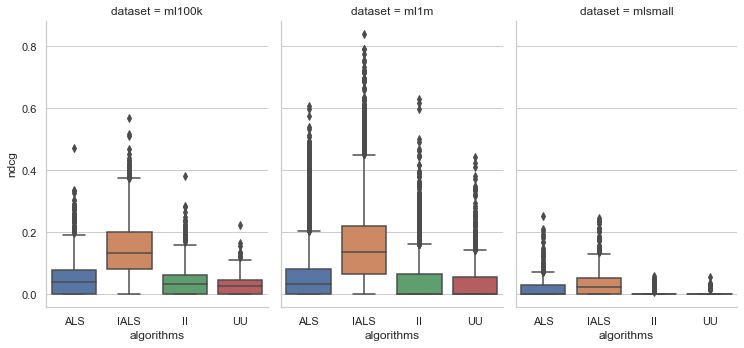

In [23]:
g = sns.catplot(x = "algorithms", y = "ndcg", data = results, kind="box", col = "dataset", aspect=.7)

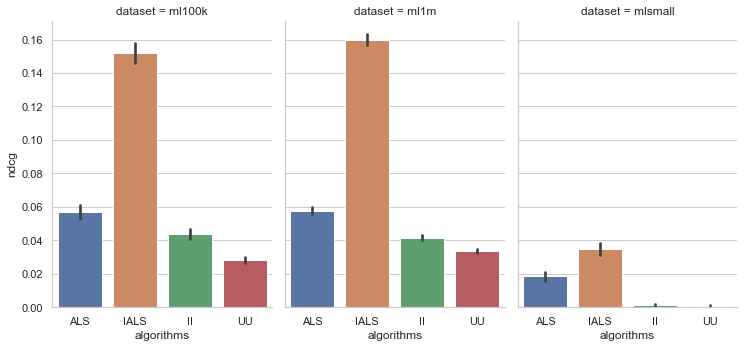

In [36]:
g = sns.catplot(x = "algorithms", y = "ndcg", data = results, kind="bar", col = "dataset", aspect=.7)

In [51]:
results['ndcg'].mean(), results['ndcg'].std()

(0.06802593155722818, 0.09464981925690458)

### precision

The precision metric treats the recommendation list as a classification of relevant items. It computes the proportion or fraction of the recommended items that were used. 

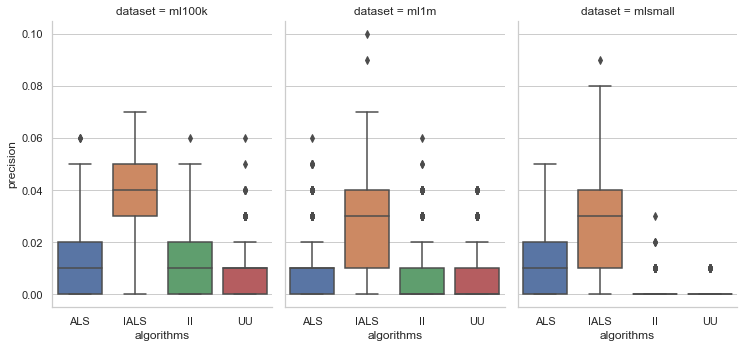

In [37]:
g = sns.catplot(x = "algorithms", y = "precision", data = results, kind="box", col = "dataset", aspect=.7)

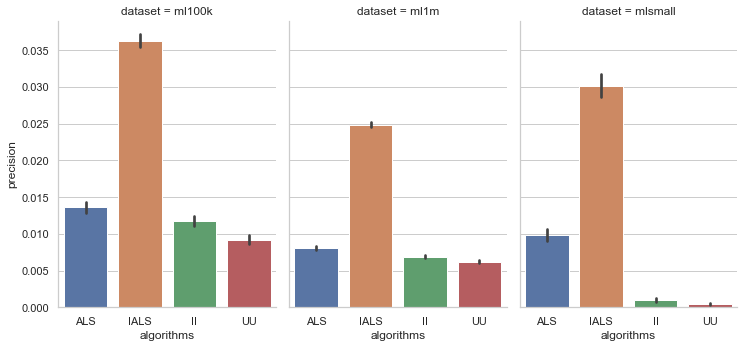

In [38]:
g = sns.catplot(x = "algorithms", y = "precision", data = results, kind="bar", col = "dataset", aspect=.7)

### reciprocal rank

The reciprocal rank metric measures the average number of items scanned before the first relevant item in a list of recommendations is encountered.

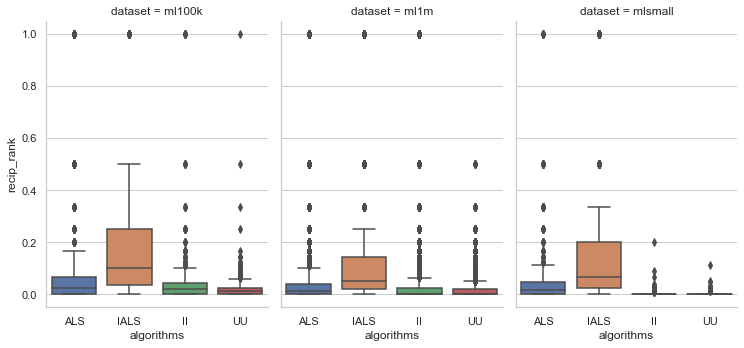

In [39]:
g = sns.catplot(x = "algorithms", y = "recip_rank", data = results, kind="box", col = "dataset", aspect=.7)

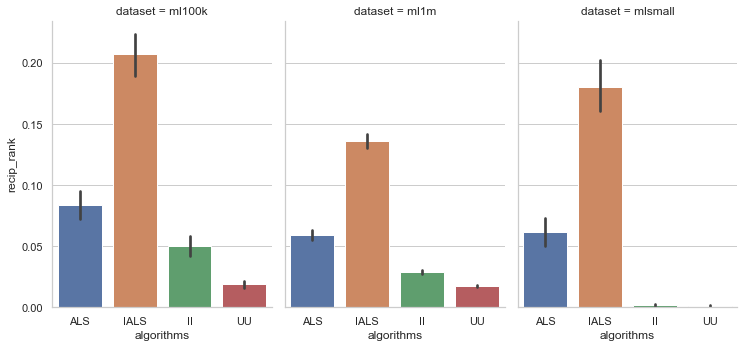

In [40]:
g = sns.catplot(x = "algorithms", y = "recip_rank", data = results, kind="bar", col = "dataset", aspect=.7)

# Prediction Accuracy Metrics

In [ ]:
global rmse by dtaset/algo
per user rmse 

RMSE Computed per-user over the predictions:

In [70]:
user_rmse = preds.groupby(['dataset','algorithms','user']).apply(lambda df: rmse(df.prediction, df.rating))
user_rmse = user_rmse.reset_index()
user_rmse.columns = ['dataset', 'algorithms', 'user', 'rmse']
user_rmse.head()

,dataset,algorithms,user,rmse
0,ml100k,ALS,1,0.709011
1,ml100k,ALS,2,1.150959
2,ml100k,ALS,3,1.213610
3,ml100k,ALS,4,0.862869
4,ml100k,ALS,5,1.141665


In [76]:
dataset_algo = user_rmse.groupby(['dataset', 'algorithms']).mean()
dataset_algo = dataset_algo.reset_index()
dataset_algo.head()

,dataset,algorithms,user,rmse
0,ml100k,ALS,472.0,0.869509
1,ml100k,IALS,472.0,2.968492
2,ml100k,II,472.0,0.860726
3,ml100k,UU,472.0,0.887957
4,ml1m,ALS,3020.5,0.832763


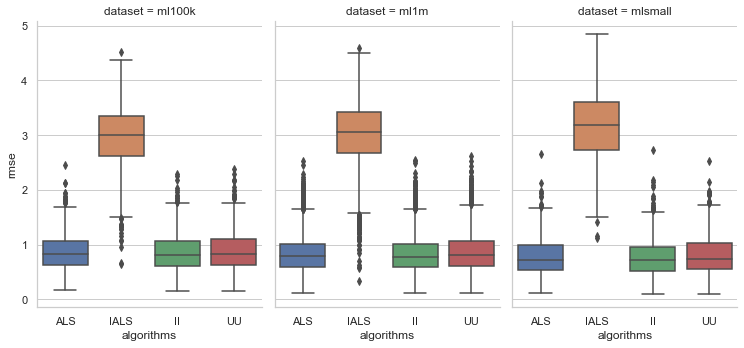

In [79]:
g = sns.catplot(x = "algorithms", y = "rmse", data = user_rmse, kind="box", col = "dataset", aspect=.7)

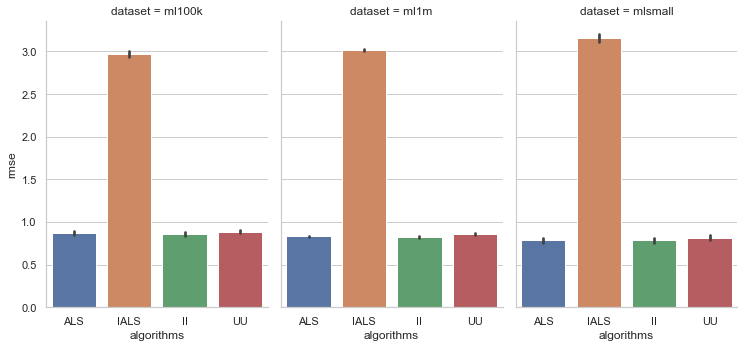

In [80]:
g = sns.catplot(x = "algorithms", y = "rmse", data = user_rmse, kind="bar", col = "dataset", aspect=.7)

In [41]:
#barplot
Sections heading
Text explaining what is going on

Notebook Title
Setup - import
load data
compute metrics
Results
Why we do things the way we do - links to lensiks

Use the forward / -d data-split/mlsmall

SyntaxError: invalid syntax (<ipython-input-41-7c0a82282d8d>, line 2)